### HealthInsurance EDA and modelling

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.io as pio 
import statsmodels.api as sm

sns.set_style('whitegrid')
pio.renderers.default = 'notebook_connected'
import warnings; warnings.simplefilter('ignore')

Basic Data Exploration

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Putting down the numerical and categorical variables.

In [5]:
num = [i for i in df.columns if df[i].dtype != 'object']
num

['age', 'bmi', 'children', 'charges']

In [6]:
cate = [i for i in df.columns if df[i].dtype == 'object']
cate

['sex', 'smoker', 'region']

Correlation Heatmap

<AxesSubplot:>

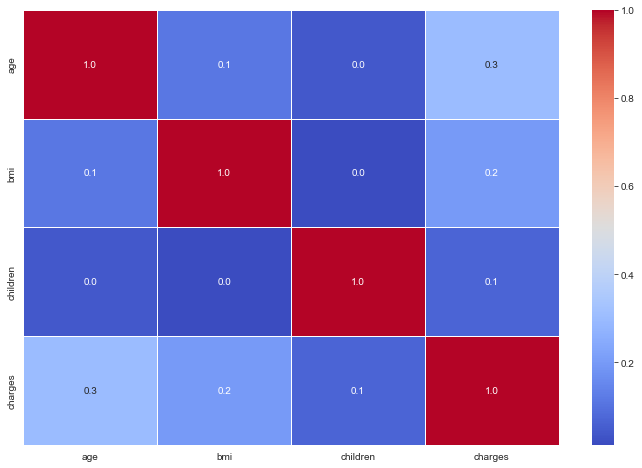

In [7]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f', cmap='coolwarm')

**NO significant correlation between the variables**

## Age

<AxesSubplot:xlabel='charges', ylabel='Count'>

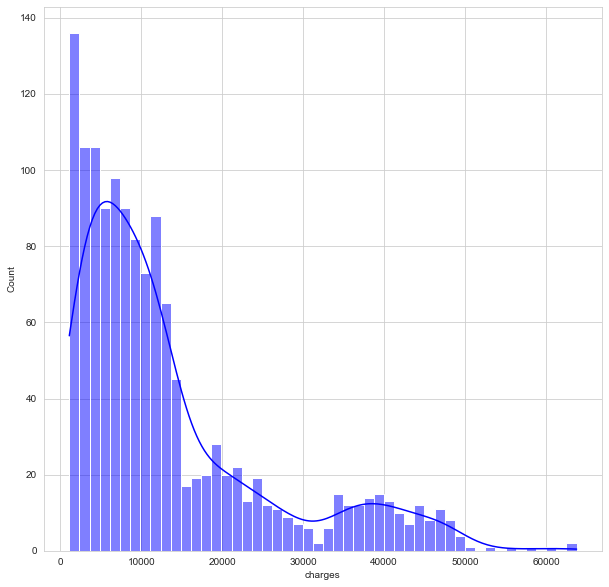

In [8]:
##Lets see interaction with the target vars charges
fig = plt.figure(figsize=(10,10))
sns.histplot(df.charges, bins=50, color='blue', label='charges',kde=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

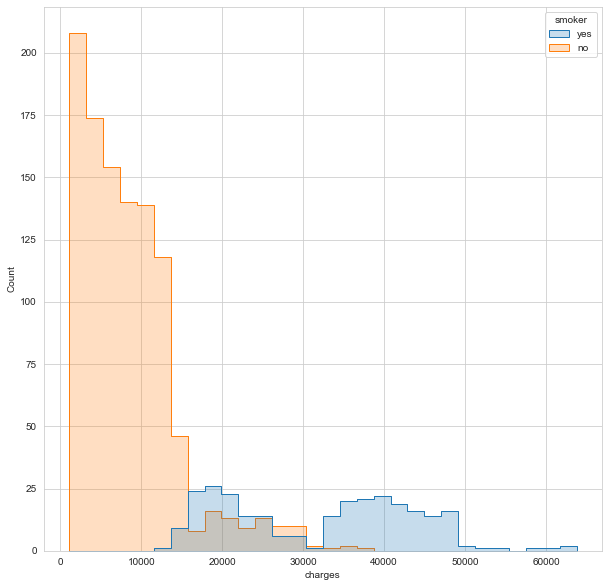

In [9]:
fig = plt.figure(figsize=(10,10))
sns.histplot(x=df.charges,hue=df.smoker,element='step')

As expected, the Insurance charges are higher for people who smoke, even a part going more than 6k. So, don't smoke, else all your money will go the hopital and you'll be poor.

In [10]:
fig = plt.figure(figsize=(10,10))
px.histogram(df, x='age',color='smoker',barmode='group')

<Figure size 720x720 with 0 Axes>

In [11]:
fig = plt.figure(figsize=(10,10))
px.histogram(df, x='age',color='sex',barmode='group')

<Figure size 720x720 with 0 Axes>

In [12]:
fig = plt.figure(figsize=(10,10))
px.histogram(df, x='age',color='region',barmode='group')

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='charges'>

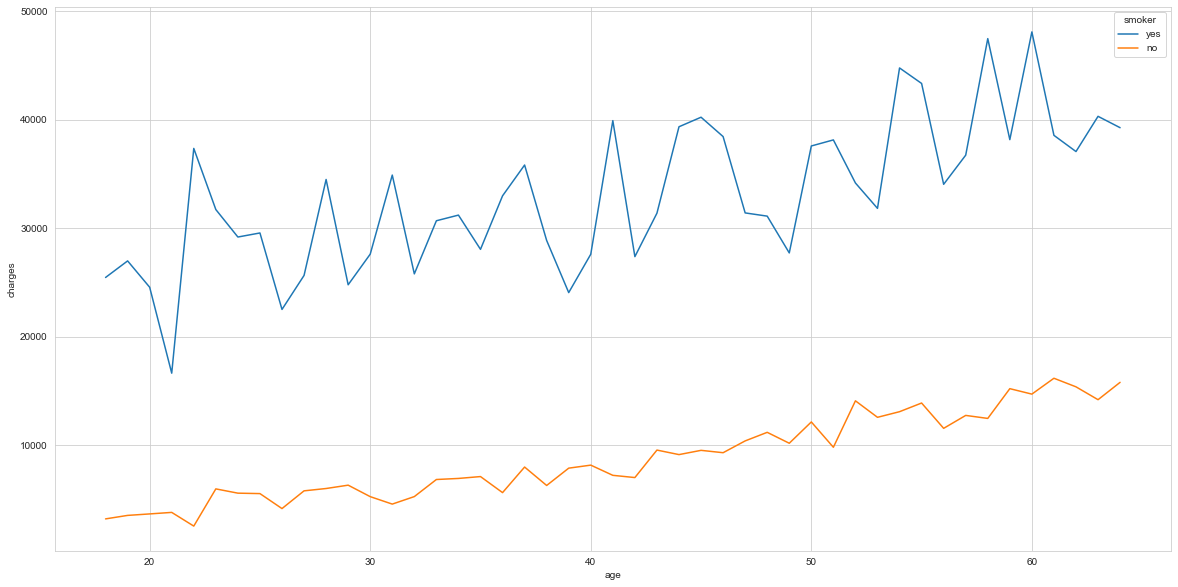

In [13]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(x='age',y='charges',hue='smoker',data=df,ci=None)

With increase in age, the Insurance charges are also increasing and also for smokers, the intial charges are much higher than non-smokers.

<AxesSubplot:xlabel='age', ylabel='charges'>

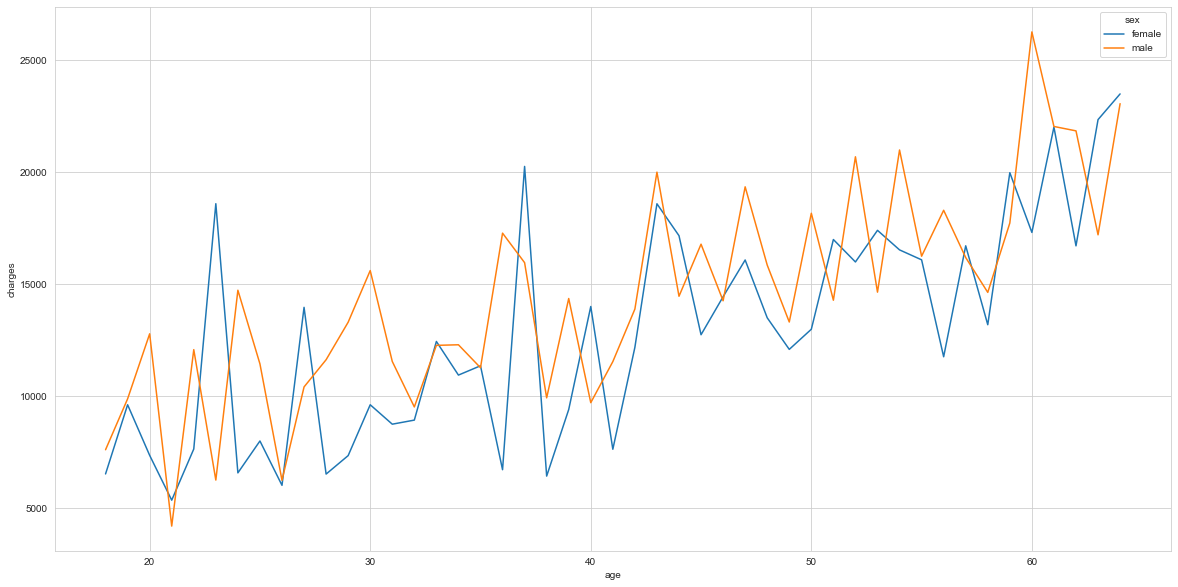

In [14]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(x='age',y='charges',hue='sex',data=df,ci=None)

Age and Sex on charges are more or less have the same increasing trend

## BMI

<AxesSubplot:xlabel='bmi', ylabel='Count'>

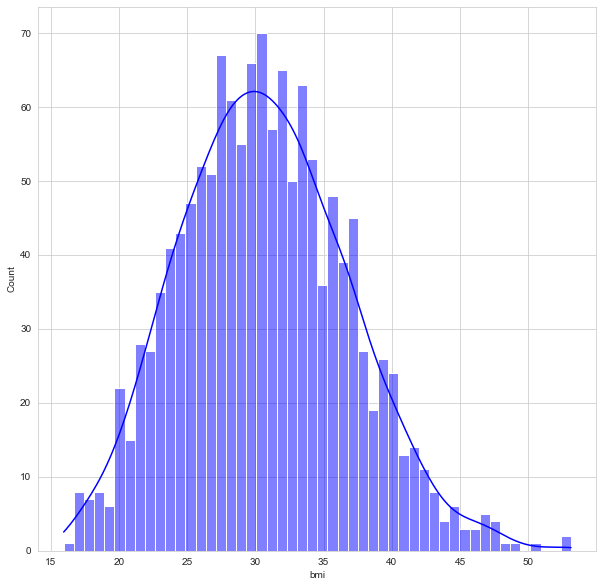

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df.bmi, bins=50, color='blue', label='bmi',kde=True)

In [ ]:
##bmi vs charges
fig = plt.figure(figsize=(20,10))
px.scatter(df,x='bmi',y='charges',color='smoker',trendline='ols')

<Figure size 1440x720 with 0 Axes>

From this graph also, we see that smoking has a high impact. The Non Smoking+bmi increase, causes the charges to increase but not more than 40K. But for smokers, the increase is more than 40K. The regression lines, show how steep the increase is.

## Prediction Models

For modelling, we first encode the string variables to numeric using LabelEncoder.

In [28]:
##Label encode the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cate:
    df[i] = le.fit_transform(df[i])

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Here, we are going to use three different models: Linear Regression, Random Forest Regression, and XGBoost Regression. Evaluation of each model is done using R-Square and Mean Absolute Error.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [74]:
##create a function which print all the evaluation metrics
def print_metrics(y_test, y_pred):
    print('r2_score: ', r2_score(y_test, y_pred))


In [70]:
def plot_important_features(imps,names):
    f_imps = np.array(imps)
    f_names = np.array(names)

    data = pd.DataFrame({'feature':f_names,'importance':f_imps})
    data = data.sort_values(by='importance',ascending=False)
    data = data.reset_index(drop=True)

    fig = plt.figure(figsize=(10,10))
    sns.barplot(y='feature',x='importance',data=data)
    plt.show()



In [41]:
#split the data into train and test
X = df.drop(['charges'],axis=1)
y = df['charges']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Models with evaluation metrics:

In [73]:
model_stats = pd.DataFrame(columns=['Model','R2'])
models = {'Linear Regression':LinearRegression(),'Random Forest':RandomForestRegressor(),'XGBoost':XGBRegressor()}

for test,clf in models.items():
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print('\n'+test+'\n')
    print_metrics(y_test,y_pred)
    model_stats.loc[len(model_stats)] = [test,r2_score(y_test, y_pred)]



Linear Regression

r2_score:  0.7833463107364539
mean_squared_error:  33635210.431178406
mean_absolute_error:  4186.508898366432

Random Forest

r2_score:  0.8647728542390017
mean_squared_error:  20993842.84264813
mean_absolute_error:  2476.668574487781

XGBoost

r2_score:  0.855507629258488
mean_squared_error:  22432257.267858785
mean_absolute_error:  2566.3321045801


**Random Forest Regression and XGBOOST gives the good r2 scoring lets see if I can improve it a bit**

In [48]:
regress = XGBRegressor()
regress.fit(x_train,y_train)
y_pred = regress.predict(x_test)
print('\n'+'XGBoost'+'\n')
print_metrics(y_test,y_pred)
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))


XGBoost

r2_score:  0.855507629258488
Mean Absolute Error:  2566.3321045801
Mean Squared Error:  22432257.267858785


In [49]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print('\n'+'Random Forest'+'\n')
print_metrics(y_test,pred)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred))
print('Mean Squared Error: ',mean_squared_error(y_test,pred))


Random Forest

r2_score:  0.863881004985405
Mean Absolute Error:  2501.6553944234142
Mean Squared Error:  21132301.307950918


Lets tune with RandomSearchCV

In [54]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [55]:
#r2 score is good but other metrics are not so good lets tune 
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

In [56]:
rf_tune = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,scoring='r2',cv=5,verbose=2,random_state=42)
rf_tune.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=2)

In [57]:
rf_tune.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [58]:
diff = rf_tune.best_estimator_
print_metrics(y_test,diff.predict(x_test))

r2_score:  0.878589215671356


Got a 1% improvement in the model, but may be improved further with more parameter tuning and data engineering.

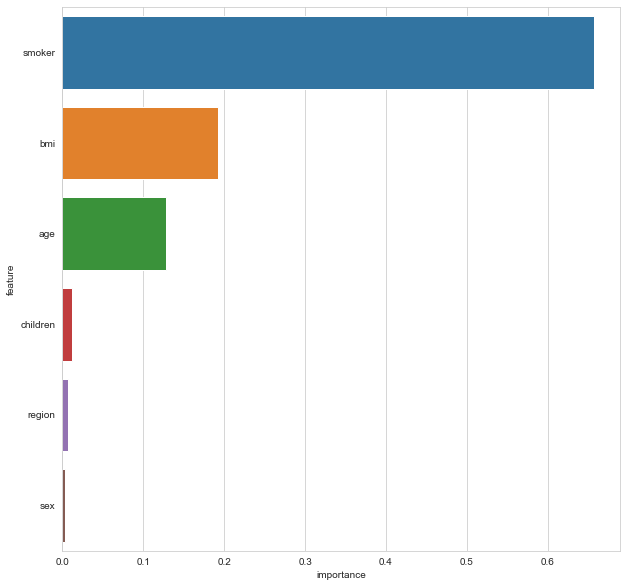

In [68]:
plot_important_features(diff.feature_importances_,X.columns)

**As seen from the other graphs, but here its more evident, that among all features smoking has a high impact on the charges.**